In [124]:
import pandas as pd
import numpy as np
import csv
import	koreanize_matplotlib
import matplotlib.pyplot as plt

## 국민연금 가입 2024 + 2022 SW 산업

In [141]:
f1 = "국민연금 가입 사업장 내역_202401.csv"
pensionDF = pd.read_csv(f1, encoding="cp949")

C:\Users\kdp\AppData\Local\Temp\ipykernel_19520\1038380759.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pensionDF = pd.read_csv(f1, encoding="cp949")


In [3]:
pensionDF.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,23-Dec,(주)니프코코리아,211814,1,31409,충청남도 아산시 둔포면,충청남도 아산시 둔포면 아산밸리남로,4420036032,4420036032,44,200,360,1,252901,포장용 플라스틱 성형용기 제조업,1988-01-01,586,301703340,1,0
1,23-Dec,신일기업(주),201810,1,4537,서울특별시 중구 충무로2가,서울특별시 중구 퇴계로,1114012500,1114055000,11,140,125,1,381002,NaN,1988-01-01,19,6727780,1,0
2,23-Dec,디에스디엘(주),104811,1,4526,서울특별시 중구 남대문로4가,서울특별시 중구 세종대로,1114011700,1114054000,11,140,117,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,16,5194300,0,0
3,23-Dec,(주)헤럴드,104810,1,4336,서울특별시 용산구 후암동,서울특별시 용산구 후암로4길,1117010100,1117051000,11,170,101,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,322,130867200,6,8
4,23-Dec,연합뉴스(주),102812,1,3143,서울특별시 종로구 수송동,서울특별시 종로구 율곡로2길,1111012400,1111061500,11,110,124,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,825,410437380,3,10


In [4]:
pensionDF.columns

Index(['자료생성년월', '사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장지번상세주소',
       '사업장도로명상세주소', '고객법정동주소코드', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드',
       '법정동주소광역시시군구읍면동코드', '사업장형태구분코드 1 법인 2 개인', '사업장업종코드', '사업장업종코드명',
       '적용일자', '가입자수', '당월고지금액', '신규취득자수', '상실가입자수'],
      dtype='object')

사용할 데이터 col을 뽑아보자

In [5]:
pensionDF = pensionDF[["사업장명", "사업장지번상세주소", "가입자수", "당월고지금액"]]

"사업장지번상세주소" -> "본사주소"로 변경

In [6]:
pensionDF.columns = ["사업장명", "본사주소", "가입자수", "당월고지금액"]
pensionDF.columns

Index(['사업장명', '본사주소', '가입자수', '당월고지금액'], dtype='object')

### 주소분리

In [7]:
pensionDF.sort_values("당월고지금액")

,사업장명,본사주소,가입자수,당월고지금액
432762,영양군청 상생 국민지원금 지급사업,경상북도 영양군 영양읍,0,0
253477,주식회사민트아이엔씨,서울특별시 영등포구 여의도동,0,0
513727,대운건설주식회사/일용/감천초등학교 병설유치원 개축공사,경상북도 김천시 감천면,0,0
458297,주식회사럭키종합건설/일용/쌍동리 59-26번지 신축공사,경기도 광주시 초월읍,0,0
513723,（주）포테이토소프트,서울특별시 은평구 대조동,0,0
...,...,...,...,...
150647,엘지디스플레이(주),서울특별시 영등포구 여의도동,27978,14141978700
134977,에스케이하이닉스 주식회사,경기도 이천시 부발읍,31145,16237739840
13145,엘지전자(주),서울특별시 영등포구 여의도동,35609,18101199080
3244,현대자동차(주),서울특별시 서초구 양재동,68427,34364239440


In [8]:
addr = pd.DataFrame(pensionDF["본사주소"])
addr = addr["본사주소"].apply(lambda x : x.split()[:2])
addr =	pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,충청남도,아산시
1,서울특별시,중구
2,서울특별시,중구
3,서울특별시,용산구
4,서울특별시,종로구


In [9]:
pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
pensionDF.head()

,사업장명,본사주소,가입자수,당월고지금액,시도,군구,나머지 주소
0,(주)니프코코리아,충청남도 아산시 둔포면,586,301703340,충청남도,아산시,둔포면
1,신일기업(주),서울특별시 중구 충무로2가,19,6727780,서울특별시,중구,충무로2가
2,디에스디엘(주),서울특별시 중구 남대문로4가,16,5194300,서울특별시,중구,남대문로4가
3,(주)헤럴드,서울특별시 용산구 후암동,322,130867200,서울특별시,용산구,후암동
4,연합뉴스(주),서울특별시 종로구 수송동,825,410437380,서울특별시,종로구,수송동


In [10]:
pensionDF = pensionDF.drop("본사주소", axis = True)

In [11]:
pensionDF["시도"].unique()

array(['충청남도', '서울특별시', '경기도', '인천광역시', '충청북도', '강원특별자치도', '부산광역시',
       '전라남도', '울산광역시', '전북특별자치도', '경상북도', '세종특별자치시', '대구광역시', '경상남도', '',
       '제주특별자치도', '대전광역시', '광주광역시'], dtype=object)

In [72]:
pensionDF[pensionDF["시도"] == ""]

,사업장명,가입자수,당월고지금액,시도,군구,나머지 주소
1113,(주)경인종합개발,6,877900,,,
1548,삼양그라비아(주),8,3380560,,,
1589,동양플러스(주),112,31775760,,,
3035,재단법인광주공원묘원,5,1621980,,,
3463,(주)세원종합유통,17,3753920,,,
...,...,...,...,...,...,...
524069,（주）운악건설/일용/심곡본동 일원(N3 6) 노후관 교체공사,0,0,,,
524268,(주)고도네트웍스/일용/부천 옥길중고 통합운형학교 신축 통신공사,3,850500,,,
525118,주식회사장원토건/상용/부천 옥길 중·고 통합운영학교 신축공사,3,1519460,,,
529241,승전종합건설주식회사/일용/부천옥길 중 고통합운영학교 신축공사 중 토목공사,6,3100500,,,


## <hr>SW 기업 DF뽑기

In [12]:
f2 = "정보통신산업진흥원_SW산업정보종합시스템 사업자정보DB_20221031.csv"
swDF = pd.read_csv(f2, encoding="cp949")

In [13]:
swDF

,회사명,대표이사,홈페이지,본사주소,재무현황연도
0,(주)라이드소프트,강태훈,http://www.rydesoft.com,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)",2009
1,(주)코제코,문시환,http://www.pressblog.co.kr,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)",2011
2,(주)시코에프에이,김관중,http://www.sico.so.kr,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)",2009
3,하니웰에어포트시스템즈게엠베하한국지점,귄테르쉬펜회펠,http://,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)",2009
4,지하정보기술(주),김창동,http://,"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",2019
...,...,...,...,...,...
52587,토탈시스,고대식,http://,"서울특별시 구로구 신도림로17길 15, 1동 9층 2호(신도림동, 온리빌딩)",2021
52588,맘스퀘스천,심재우,http://,"서울특별시 강남구 강남대로156길 14, 203호 (신사동)",2021
52589,인지믹스,김주현,http://,"대구광역시 달서구 상인로 128, 2층 205호(상인동, 달서구시니어기술창업센터)",2021
52590,(주)서이시스템,박형호,http://www.seoisystem.com,"경기도 하남시 미사강변중앙로7번안길 25, A동 5층 503호 (풍산동, 유테크밸리)",2021


In [14]:
swDF.columns

Index(['회사명', '대표이사', '홈페이지', '본사주소', '재무현황연도'], dtype='object')

In [15]:
swDF = swDF[["회사명", "본사주소"]]
swDF.head()

,회사명,본사주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


회사명 -> 사업장명으로 변경

In [16]:
swDF.columns = ["사업장명", "본사주소"]
swDF.head()
# f.reindex(columns=['http_status', 'user_agent'])

,사업장명,본사주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


In [18]:
swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)
swDF.head()

C:\Users\kdp\AppData\Local\Temp\ipykernel_19520\1661869292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)
C:\Users\kdp\AppData\Local\Temp\ipykernel_19520\1661869292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swDF[["시도", "군구", "나머지 주소"]] = swDF["본사주소"].str.split(' ', n=2, expand=True)


,사업장명,본사주소,시도,군구,나머지 주소
0,(주)라이드소프트,"경기도 성남시 수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)",경기도,성남시,"수정구 탄리로 57, 성남벤처빌딩 207호 (수진동)"
1,(주)코제코,"서울 서초구 반포대로 90(서초동, 세환빌딩5층)",서울,서초구,"반포대로 90(서초동, 세환빌딩5층)"
2,(주)시코에프에이,"서울특별시 금천구 가산디지털2로 114, 3층 302호 (가산동)",서울특별시,금천구,"가산디지털2로 114, 3층 302호 (가산동)"
3,하니웰에어포트시스템즈게엠베하한국지점,"인천광역시 중구 공항동로295번길 124, 신불2단지 (운서동)",인천광역시,중구,"공항동로295번길 124, 신불2단지 (운서동)"
4,지하정보기술(주),"경기도 의왕시 이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",경기도,의왕시,"이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)"


In [19]:
swDF = swDF.drop("본사주소", axis=True)

In [20]:
swDF["시도"].unique()

array(['경기도', '서울', '서울특별시', '인천광역시', '대구', '경상북도', '전라북도', '대전광역시',
       '대구광역시', '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원도', '충청남도', '경상남도',
       '광주광역시', '경북', '인천', '경기', '충남', '대전', '울산광역시', '전북', '세종특별자치시',
       '충북', '제주', '서울시', '광주', '강원', '부산', '울산', '전남', '울산시', '인천시중구',
       '부산시', '서울특별', '서울특별시시', '제주시', '경남', '대구시', '대전시',
       '충북청주기청원구토성로362번길', '인천광역시동구', '인천시', '광주시'], dtype=object)

In [41]:
addr_aliases =	{'서울':'서울특별시', '대구':'대구광역시', "대구시":"대구광역시",'경북':'경상북도',	'인천':'인천광역시',	
'경기':'경기도',	'충남':'충청남도', '대전':'대전광역시', '전북':'전북특별자치도', "전라북도":"전북특별자치도",	
'충북':'충청북도', '제주':'제주특별자치도', "서울시":"서울특별시", "광주":"광주광역시", "강원":"강원특별자치도", "부산":"부산광역시", "울산":"울산광역시", "전남":"전라남도", "울산시":"울산광역시", "인천시중구":"인천광역시",
"부산시":"부산광역시", "서울특별":"서울특별시", "서울특별시시":"서울특별시", "제주시":"제주특별자치도", "경남":"경상남도", "대구":"대구광역시", "대전시":"대전광역시", "충북청주기청원구토성로362번길":"충청북도", "인천광역시동구":"인천광역시",
"인천시":"인천광역시", "광주시":"광주광역시", "강원도":"강원특별자치도"}

In [42]:
swDF['시도'] = swDF['시도'].apply(lambda	v: addr_aliases.get(v, v))

In [43]:
swDF["시도"].unique()

array(['경기도', '서울특별시', '인천광역시', '대구광역시', '경상북도', '전북특별자치도', '대전광역시',
       '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원특별자치도', '충청남도', '경상남도',
       '광주광역시', '울산광역시', '세종특별자치시'], dtype=object)

## join 사업장명을 기준으로
- swDF->본사만
- pensionDF->지사포함

In [80]:
mergeDF = pd.merge(swDF, pensionDF, on=["사업장명"])
mergeDF.head()

,사업장명,시도_x,군구_x,나머지 주소_x,가입자수,당월고지금액,시도_y,군구_y,나머지 주소_y
0,(주)시코에프에이,서울특별시,금천구,"가산디지털2로 114, 3층 302호 (가산동)",14,6049380,서울특별시,금천구,가산동
1,지하정보기술(주),경기도,의왕시,"이미로 40, 디동 디 609호 (포일동, 인덕원아이티밸리)",16,5783500,경기도,의왕시,포일동
2,(주)베스텍,경기도,포천시,화현면 문암동길 33,25,9088760,경기도,포천시,화현면
3,(주)베스텍,경기도,포천시,화현면 문암동길 33,7,2637340,충청남도,아산시,둔포면
4,(주)베스텍,경기도,포천시,화현면 문암동길 33,40,11733040,광주광역시,북구,연제동


In [83]:
mergeDF['시도_y'] = np.where(mergeDF['시도_y']==" ", mergeDF['시도_y'], mergeDF['시도_x'])
mergeDF["시도_y"].value_counts()

서울특별시      5318
경기도        3200
대전광역시       769
부산광역시       677
경상북도        639
전라남도        637
강원특별자치도     574
대구광역시       517
경상남도        517
인천광역시       515
충청남도        441
전북특별자치도     421
충청북도        410
광주광역시       352
울산광역시       202
제주특별자치도     193
세종특별자치시     141
Name: 시도_y, dtype: int64

In [84]:
mergeDF["사업장명"].value_counts() # 대부분이 지사임 

대신네트웍스(주)      108
대신네트웍스주식회사      54
대신네트웍스 주식회사     24
대한민국고엽제전우회      21
주식회사 디에이치       18
              ... 
(주)지케이네트웍스       1
대신정보기술(주)        1
삼일씨티에스(주)        1
(주)나우티앤에스        1
(주)서이시스템         1
Name: 사업장명, Length: 11877, dtype: int64

In [85]:
mergeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15523 entries, 0 to 15522
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사업장명      15523 non-null  object
 1   시도_x      15523 non-null  object
 2   군구_x      15523 non-null  object
 3   나머지 주소_x  15523 non-null  object
 4   가입자수      15523 non-null  int64 
 5   당월고지금액    15523 non-null  int64 
 6   시도_y      15523 non-null  object
 7   군구_y      15523 non-null  object
 8   나머지 주소_y  15523 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [48]:
a = ['경기도', '서울특별시', '인천광역시', '대구광역시', '경상북도', '전북특별자치도', '대전광역시',
       '충청북도', '부산광역시', '전라남도', '제주특별자치도', '강원특별자치도', '충청남도', '경상남도',
       '광주광역시', '울산광역시', '세종특별자치시'] # swDF

b = ['충청남도', '서울특별시', '경기도', '인천광역시', '충청북도', '강원특별자치도', '부산광역시',
       '전라남도', '울산광역시', '전북특별자치도', '경상북도', '세종특별자치시', '대구광역시', '경상남도', '',
       '제주특별자치도', '대전광역시', '광주광역시'] # pensionDF

In [51]:
set(a) - set(b)

set()

In [86]:
mergeDF2 = mergeDF.drop(["시도_x", "군구_x", "나머지 주소_x"],axis = True)
mergeDF2

,사업장명,가입자수,당월고지금액,시도_y,군구_y,나머지 주소_y
0,(주)시코에프에이,14,6049380,서울특별시,금천구,가산동
1,지하정보기술(주),16,5783500,경기도,의왕시,포일동
2,(주)베스텍,25,9088760,경기도,포천시,화현면
3,(주)베스텍,7,2637340,경기도,아산시,둔포면
4,(주)베스텍,40,11733040,경기도,북구,연제동
...,...,...,...,...,...,...
15518,주식회사 컬쳐커넥션,7,2140360,경기도,수원시,영통구 이의동
15519,(주)시에스티코리아,4,1178800,서울특별시,동작구,사당동
15520,(주)포테이토넷,9,2445000,서울특별시,광진구,화양동
15521,주식회사 씽크렉스,4,758880,충청남도,천안시,서북구 백석동


In [87]:
mergeDF2.sort_values("당월고지금액")
mergeDF2.columns = ["사업장명", "가입자수", "당월고지금액", "시도", "군구", "나머지 주소"]
mergeDF2.head()

,사업장명,가입자수,당월고지금액,시도,군구,나머지 주소
0,(주)시코에프에이,14,6049380,서울특별시,금천구,가산동
1,지하정보기술(주),16,5783500,경기도,의왕시,포일동
2,(주)베스텍,25,9088760,경기도,포천시,화현면
3,(주)베스텍,7,2637340,경기도,아산시,둔포면
4,(주)베스텍,40,11733040,경기도,북구,연제동


In [116]:
col_list = mergeDF2["시도"].unique()
for col in col_list:
    print(f"================{col}================")
    print(mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])

================서울특별시================
4783       엘지전자(주)
5276    삼성에스디에스(주)
2563      현대모비스(주)
Name: 사업장명, dtype: object
================경기도================
4274     삼성전자(주)
4160    주식회사 케이티
6196     한국농어촌공사
Name: 사업장명, dtype: object
================경상남도================
6327       현대위아(주)
2644    (주)수성엔지니어링
3364       영풍전자(주)
Name: 사업장명, dtype: object
================충청북도================
13986        (주)네패스
11732     주식회사 씨앤에스
6579     충북대학교산학협력단
Name: 사업장명, dtype: object
================부산광역시================
9492       (주)휴넥트
2469      극동건설(주)
3066    대양전기공업(주)
Name: 사업장명, dtype: object
================대전광역시================
7405      한국수자원공사
7186    (주)케이티씨에스
58      한국전자통신연구원
Name: 사업장명, dtype: object
================강원특별자치도================
5752     (주)더존비즈온
5159        (주)서흥
1897    (주)한국고용정보
Name: 사업장명, dtype: object
================경상북도================
4620      한국전력기술(주)
4473       한국교통안전공단
14098    (주)동성엔지니어링
Name: 사업장명, dtype: object
================대구광역시================
10084 

In [114]:
#mergeDF2[mergeDF2["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"]
col_list

['사업장명', '가입자수', '당월고지금액', '시도', '군구', '나머지 주소']

## <hr>Group Area 

In [93]:
group_area = mergeDF2.groupby(["시도"]).sum()
group_area.head()

C:\Users\kdp\AppData\Local\Temp\ipykernel_19520\1388286200.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_area = mergeDF2.groupby(["시도"]).sum()


,가입자수,당월고지금액
시도,,
강원특별자치도,12647,3897082880
경기도,257064,114437542340
경상남도,14656,5167267480
경상북도,15273,5297127600
광주광역시,7000,2034469260


In [95]:
group_area["div"] = group_area["당월고지금액"] / group_area["가입자수"]

In [119]:
group_area = group_area.sort_values("div", ascending=False)
group_area

,가입자수,당월고지금액,div
시도,,,
경기도,257064,114437542340,445171.406109
서울특별시,419112,159180722640,379804.736300
전라남도,19510,6980782120,357805.336750
경상남도,14656,5167267480,352570.106441
경상북도,15273,5297127600,346829.542330
인천광역시,20213,6872391560,339998.592985
대전광역시,37326,12261318280,328492.693565
충청남도,10438,3410601480,326748.561027
울산광역시,3946,1244976000,315503.294475


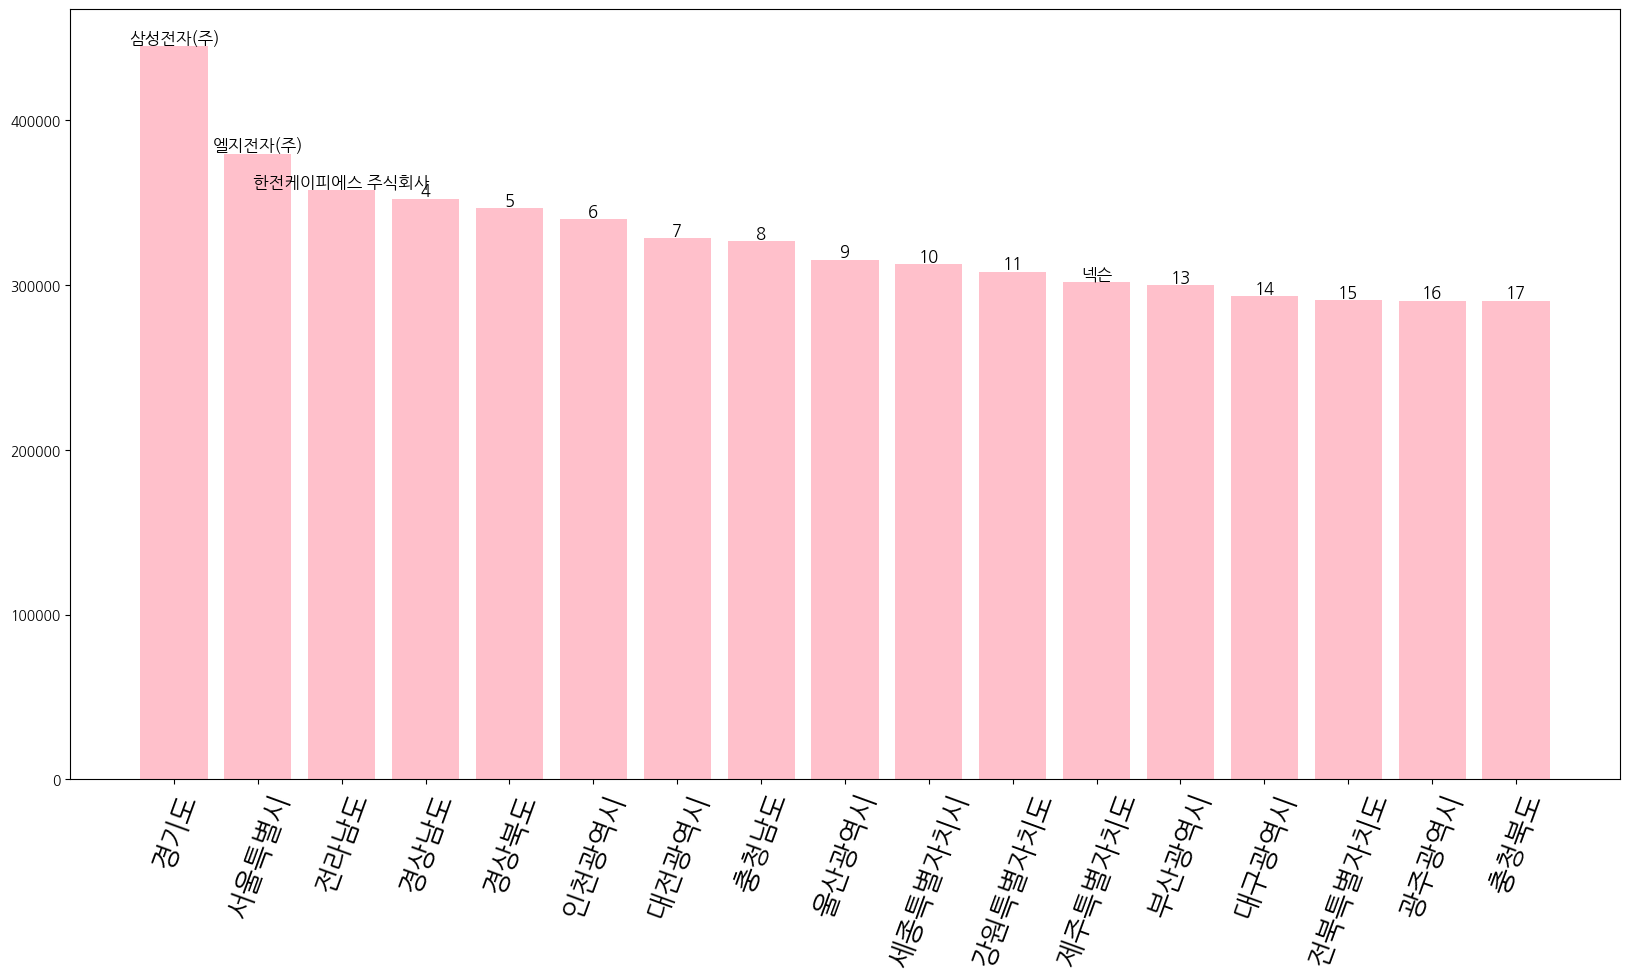

In [139]:
plt.figure(figsize=(20, 10))
x = group_area.index.to_list()
y = group_area["div"].to_list()
bar = plt.bar(x, y, color = 'pink')
plt.xticks(rotation=70)
# plt.ylim(280000, 350000)
plt.rc('xtick', labelsize=20)

company = ["삼성전자(주)", "엘지전자(주)", "한전케이피에스 주식회사", "4", "5", "6", "7", "8", "9", "10", "11", "넥슨", "13", "14", "15", "16", "17"]
idx = 0
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 12)
    idx += 1